In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [54]:
data = pd.read_csv("New Dataset 5000.csv")

In [55]:
data.shape

(5091, 16)

In [56]:
data.head()

StationId        Datetime  PM2.5  PM10    NO    NO2    NOx    NH3    CO  \
0     TG002  5/14/2018 0:00  35.25  88.5  2.12  33.10  19.30  14.10  0.96   
1     TG002  5/14/2018 1:00  32.00  73.5  2.17  20.30  12.60  13.80  0.17   
2     TG002  5/14/2018 2:00  20.50  58.0  3.00  17.35  11.65  13.48  1.53   
3     TG002  5/14/2018 3:00  21.00  50.0  2.73  18.28  11.93  13.50  2.96   
4     TG002  5/14/2018 4:00  18.50  43.5  2.20  16.38  10.45  15.13  3.49   

    SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  1.97  67.25     4.98     7.43    2.70  168   Moderate  
1  2.77  80.75     3.40     4.27    1.57  124   Moderate  
2  2.95  77.22     2.02     2.55    1.18  124   Moderate  
3  2.02  36.35     1.42     1.57    0.80  124   Moderate  
4  2.20  70.90     1.20     1.10    1.03  124   Moderate

In [57]:
filter_data = data[data['AQI']<=100]

In [58]:
filter_data.shape

(2657, 16)

In [30]:
filter_data.head(15)

StationId         Datetime  PM2.5   PM10    NO    NO2    NOx    NH3    CO  \
18     TG002  5/14/2018 19:00  26.50  65.50  2.30  20.78  12.90  14.20  0.02   
19     TG002  5/14/2018 20:00  21.00  47.75  2.15  18.45  11.58  13.52  0.00   
20     TG002  5/14/2018 21:00  19.25  49.25  1.95  26.03  15.42  13.40  0.00   
28     TG002  5/16/2018 13:00  25.25  58.00  3.30  17.45  11.98  10.87  1.33   
37     TG002   5/18/2018 2:00  16.75  44.25  2.23  25.73  15.45  10.80  0.05   
38     TG002   5/18/2018 3:00  18.25  54.00  2.50  26.42  16.08  11.88  0.00   
39     TG002   5/18/2018 4:00  16.25  52.25  2.48  24.45  15.00  13.68  0.94   
40     TG002   5/18/2018 5:00  18.50  48.00  2.07  26.50  15.77  12.20  0.97   
41     TG002   5/18/2018 7:00  31.75  59.50  3.70  36.53  22.43  13.93  0.20   
42     TG002   5/18/2018 8:00  32.75  58.25  3.73  21.33  14.37  15.22  0.00   
43     TG002   5/18/2018 9:00  27.50  50.75  3.27  14.95  10.62  14.02  0.07   
44     TG002  5/18/2018 10:00  24.00  53.25  2.70  15.92  10.67  14.02  0.10   
45     TG002  5/18/2018 11:00  28.25  55.25  2.50  18.20  11.70  15.15  0.04   
46     TG002  5/18/2018 12:00  31.25  61.25  1.43   9.88  12.80   7.70  0.42   
47     TG002  5/18/2018 13:00  28.75  68.50  3.22  17.47  11.90  12.08  0.01   

     SO2     O3  Benzene  Toluene  Xylene  AQI    AQI_Bucket  
18  0.25  68.22     2.90     9.67    2.82   98  Satisfactory  
19  0.27  35.48     1.80     5.25    2.05   98  Satisfactory  
20  0.10  85.75     1.83     3.65    1.85   98  Satisfactory  
28  6.48  86.77     2.05     2.10    0.92   93  Satisfactory  
37  0.90  60.80     1.65     2.42    4.02   87  Satisfactory  
38  0.70  27.20     1.83     1.80    3.35   84  Satisfactory  
39  1.15  57.50     1.95     1.93    3.28   81  Satisfactory  
40  0.20  46.95     1.47     1.45    2.60   77  Satisfactory  
41  0.40  38.85     1.95     4.60    2.78   72  Satisfactory  
42  1.20  67.40     3.03     9.50    3.40   69  Satisfactory  
43  1.45  80.65     2.45     5.10    3.10   81  Satisfactory  
44  2.50  85.10     1.97     2.78    2.95   85  Satisfactory  
45  1.30  92.10     1.92     2.25    2.60   92  Satisfactory  
46  1.42  92.63     2.02     2.25    2.37   93  Satisfactory  
47  1.05  95.27     2.40     3.30    2.30   95  Satisfactory

In [31]:
co_val = filter_data['CO']
aqi_val = filter_data['AQI']

Text(0.5, 1.0, 'WHEN aqi is <=100')

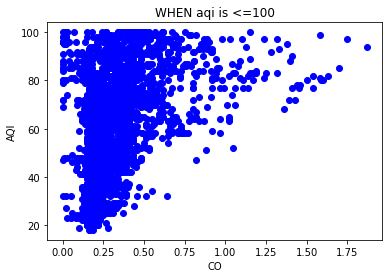

In [51]:
plt.scatter(co_val, aqi_val, color='blue', label='Original data')
plt.xlabel('CO')
plt.ylabel('AQI')
plt.title('WHEN aqi is <=100')

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(co_val, aqi_val, test_size=0.20, random_state=40)

In [46]:
regression = LinearRegression()


In [47]:
regression.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [49]:
aqi_pred = regression.predict(X_test.values.reshape(-1,1))

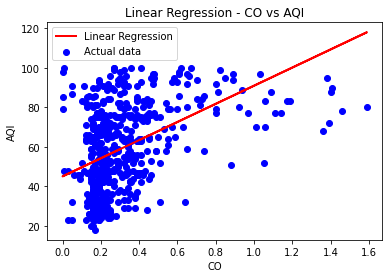

In [50]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, aqi_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('CO')
plt.ylabel('AQI')
plt.title('Linear Regression - CO vs AQI')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, aqi_pred)
print("R-squared score:", r2)

R-squared score: 0.17144307871408304


In [59]:
no2_val = filter_data['NO2']
aqi_val = filter_data['AQI']

Text(0.5, 1.0, 'WHEN aqi is <=100')

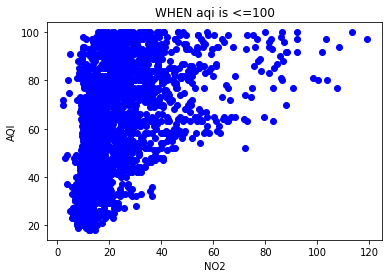

In [60]:
plt.scatter(no2_val, aqi_val, color='blue', label='Original data')
plt.xlabel('NO2')
plt.ylabel('AQI')
plt.title('WHEN aqi is <=100')

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(no2_val, aqi_val, test_size=0.20, random_state=40)

In [62]:
regression = LinearRegression()
regression.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [63]:
aqi_pred = regression.predict(X_test.values.reshape(-1,1))

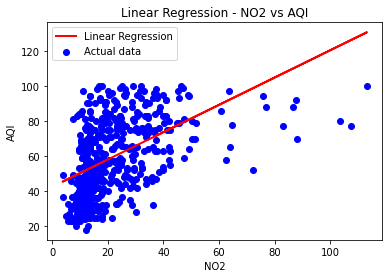

In [64]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, aqi_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('NO2')
plt.ylabel('AQI')
plt.title('Linear Regression - NO2 vs AQI')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, aqi_pred)
print("R-squared score:", r2)

R-squared score: 0.22598057836042695
